In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, random, seed

In [2]:
# Datasets originais reduzidos

TRAIN_PATH = 'dataset/train_redu.csv'
TEST_PATH = 'dataset/test_redu.csv'

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [3]:
train.head()

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961


In [4]:
# filtro de valores 1 e 5
train1x5 = train[train['label'].isin([1, 5])]
test1x5 = test[test['label'].isin([1, 5])]

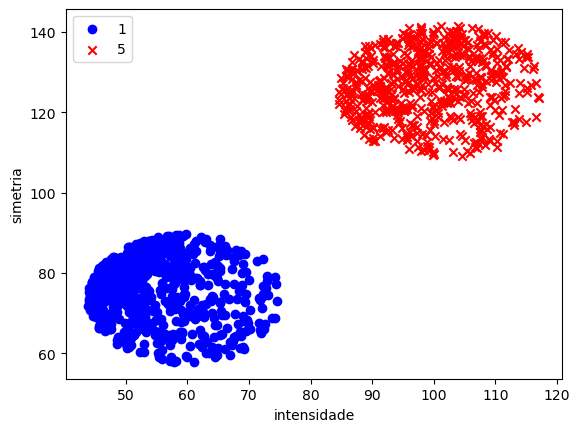

In [5]:
# Plotagem de gráficos
train1 = train1x5[train1x5['label']==1]
train5 = train1x5[train1x5['label']==5]

fig, ax = plt.subplots()
ax.scatter(train1['intensidade'] ,train1['simetria'], label="1", color='b', marker='o')
ax.scatter(train5['intensidade'] ,train5['simetria'], label="5", color='r', marker='x')
ax.set_xlabel('intensidade')
ax.set_ylabel('simetria')
ax.legend()
plt.show()


Construir vetores

In [16]:
X_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

X_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

Perceptron [ta bem sujo]

A linha de decisão é dada pela equação: $w_1x_1+w_2x_2+b=0$, onde $w_1 e w_2$​ são os pesos e b é o viés.

$w=w+y_ix_i$

In [17]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.

    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.

    """

    #inicializando
    l = []
    new_y = []

    #para cada ponto
    for j in range(len(X)):

      #adiciona o bias ao ponto
      x_i = np.insert(X[j], 0, 1)

      #se o ponto está classificado incorretamente...
      if np.sign(np.dot(w, x_i)) != y[j]:

        #adiciona o indice
        l.append(j)
        #adiciona a classificação correta
        new_y.append(y[j])

    return l, new_y

In [18]:
def PLA(X, y):

  """
  Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.

  Paramêtros:
  - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
  às coordenadas dos pontos gerados.
  - y (list): Classificação dos pontos da amostra X.
  - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
  da função alvo.

  Retorno:
  - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
  - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
  """

  '''
  mini-dicionario de funções

  np.random.choice -> escolhe aleatoriamente um elemento de uma lista
  np.sign -> retorna o sinal de um numero (1, se positivo; -1, se negativo e 0 se zero)
  np.dot -> calcula o produto escalar entre 2 vetores
  np.sign(np.dot(w, np.insert(X[j], 0, 1))) -> classificação do perceptron

  y[i] -> classificação real do ponto i dos dados X
  x_i -> vetor de entrada X[i] + viés (bias)
  '''

  #inicializando pesos (w) e contador (it) zerados
  w = [0, 0, 0]
  it = 0

  #lista de pontos classificados incorretamente recebe os indices dos pontos
  listaPCI, _ = constroiListaPCI(X, y, w)


  while (len(listaPCI) > 0):

    #escolhe um dos pontos
    i = np.random.choice(listaPCI)
    #adiciona o viés (bias / parametro adicional de ajuste, para não ficar se repetindo)
    x_i = np.insert(X[i], 0, 1)

    #verificamos se o ponto está classificado corretamenete
    #se o ponto não está classificado corretamente com os pesos...
    if np.sign(np.dot(x_i, w)) != y[i]:

      #atualiza os pesos
      w = w + y[i] * x_i
      #incrementa o contador
      it += 1

      # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()
      #plot_grafico(X, y, w, f)

      #atualizamos a lista dos pontos
      listaPCI, _ = constroiListaPCI(X, y, w)

  return it, w

In [19]:
PLA(X_train, y_train)

KeyError: 0

In [7]:
def perceptron_learning_algorithm(X, y, f=None):
    """
    Algoritmo de Aprendizagem Perceptron com escolha aleatória de pontos incorretamente classificados.

    Parâmetros:
    - X (np.array): Matriz com as características (incluir coluna de bias).
    - y (np.array): Rótulos das classes.
    - f (list): Lista com coeficientes para a função alvo (opcional).

    Retorno:
    - w (np.array): Vetor de pesos final.
    - it (int): Número de iterações realizadas.
    """
    
    # Adiciona o termo de bias
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Inicializa os pesos com zeros
    w = np.zeros(X.shape[1])
    
    it = 0
    while True:
        # Encontra pontos incorretamente classificados
        listaPCI = [i for i in range(len(X)) if np.sign(np.dot(X[i], w)) != y[i]]
        
        if len(listaPCI) == 0:
            break
        
        # Escolhe aleatoriamente um ponto da listaPCI
        i = np.random.choice(listaPCI)
        
        # Atualiza os pesos
        w += y[i] * X[i]
        
        it += 1
        
        # Plota o gráfico após cada atualização, se a função alvo for fornecida

    
    return w, it

In [8]:
perceptron_learning_algorithm(X_train, y_train)

KeyError: 0

In [51]:
def PLA(X, y):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.
    
    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.
    
    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """

    # Inicialização dos pesos
    '''
    w0 = peso do termo de bias
    w1 = peso do eixo x (primeira caracteristica)
    w2 = peso do eixo y (segunda caracteristica)
    '''

    w = [0,0,0]
    it = 0

    listaPCI = X
    while (len(listaPCI) > 0):
        listaPCI = []

        for i in range(len(X)):
            print('entrou')
            x_i = [1] + list(X[i]) # adiciona po termo de bias ao vetor de entrada
            y_i = y[i] #ground truth sobre a rotulagem do ponto

            dot_product = sum(np.dot(w[j], x_i[j]) for j in range(len(w))) #calcula o produto escalar entre os pesos e o vetor de entrada

            if (np.sign(dot_product) != y_i): #verifica se o ponto foi classificado corretamente
                listaPCI.append(i)
                w = [w[j] + y_i*x_i[j] for j in range(len(w))]
                print(w)
                print(len(listaPCI))

        
        # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()
        #plot_grafico(X, y, w, f) 
        it+=1       
        
        
    return it, w            

In [50]:
PLA(X_train, y_train)

NameError: name 'entrou' is not defined

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_learning_algorithm(X, y, f=None):
    """
    Algoritmo de Aprendizagem Perceptron com escolha aleatória de pontos incorretamente classificados.

    Parâmetros:
    - X (np.array): Matriz com as características (incluir coluna de bias).
    - y (np.array): Rótulos das classes.
    - f (list): Lista com coeficientes para a função alvo (opcional).

    Retorno:
    - w (np.array): Vetor de pesos final.
    - it (int): Número de iterações realizadas.
    """
    
    # Adiciona o termo de bias
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Inicializa os pesos com zeros
    w = np.zeros(X.shape[1])
    
    it = 0
    while True:
        # Encontra pontos incorretamente classificados
        listaPCI = [i for i in range(len(X)) if np.sign(np.dot(X[i], w)) != y[i]]
        
        if len(listaPCI) == 0:
            break
        
        # Escolhe aleatoriamente um ponto da listaPCI
        i = np.random.choice(listaPCI)
        
        # Atualiza os pesos
        w += y[i] * X[i]
        
        it += 1
        
        # Plota o gráfico após cada atualização, se a função alvo for fornecida
        if f is not None:
            plot_grafico(X[:, 1:], y, w, f)
    
    return w, it

def plot_grafico(X, y, w, f=None):
    """
    Plota o gráfico dos dados e da linha de decisão do perceptron.
    
    Parâmetros:
    - X (np.array): Matriz com as coordenadas dos pontos.
    - y (np.array): Lista com os rótulos correspondentes.
    - w (np.array): Vetor de pesos do perceptron.
    - f (list): Lista com coeficientes para a função alvo (opcional).
    """
    
    plt.figure(figsize=(8, 6))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    # Plota os pontos
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=10, c='blue', label='Classe 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], s=10, c='red', label='Classe -1')
    
    if f is not None:
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        y_vals = f[0] * x_vals + f[1]
        plt.plot(x_vals, y_vals, color='green', label='Função alvo')
    
    # Plota a linha de decisão
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = - (w[0] + w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, color='orange', label='Linha de decisão')
    
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.legend(loc='best')
    plt.show()

# Exemplo de uso com dados fictícios
# Supondo que train1x5['intensidade'] e train1x5['simetria'] sejam arrays ou listas
X_train = np.array([(x, y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])])
y_train = np.array(train1x5['label'])

# Executa o algoritmo
w, it = perceptron_learning_algorithm(X_train, y_train)

# Plota o gráfico
plot_grafico(X_train, y_train, w, f=[0.5, 0])  # f é opcional e só usado se houver uma função alvo


KeyboardInterrupt: 

In [23]:
X_train = np.array()

(44.70588235294117, 69.27058823529413)

In [ ]:
PLA(X_train, y_train)

KeyError: 0

In [20]:
_, w = PLA(X_train, y_train)


KeyError: 0